### 1) Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### 2) Data

In [64]:
data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['label'] = data.target

In [65]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [66]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} Columns in our Dataset')

There are 569 rows and 31 Columns in our Dataset


In [67]:
## getting some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [68]:
# statistical measures about the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


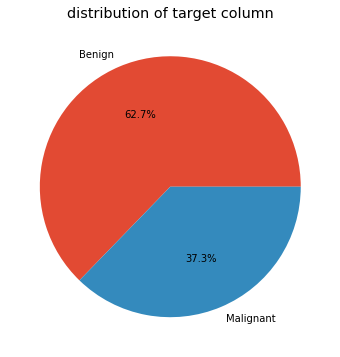

In [69]:
targetValues = df.label.value_counts()
plt.figure(figsize=(12,6))
plt.title('distribution of target column')
plt.pie(targetValues.values , labels=['Benign','Malignant'],autopct='%1.1f%%')
plt.show()

In [70]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### 3) Model Building 

In [71]:
X = df.drop('label', axis = 1)
Y = df['label']

In [72]:
# spliting data 
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.20 , random_state=42)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [74]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

In [88]:
forest = RandomForestClassifier()
forest.fit(X_train , y_train)
forest.score(X_train , y_train)

1.0

#### Deep Learning 

In [75]:
# setting up the layers of neural network 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(2,activation = 'sigmoid')
])

In [76]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
history = model.fit(X_train , y_train, validation_split=0.1 , epochs = 15)

Epoch 1/15
13/13 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.8998 - val_loss: 0.6045 - val_accuracy: 0.8043
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8924 - val_loss: 0.4853 - val_accuracy: 0.8261
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9022 - val_loss: 0.3111 - val_accuracy: 0.8913
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9144 - val_loss: 0.3469 - val_accuracy: 0.8696
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9315 - val_loss: 0.3234 - val_accuracy: 0.8696
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9120 - val_loss: 0.3322 - val_accuracy: 0.8696
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9291 - val_loss: 0.3130 - val_accuracy: 0.8696
Epoch 8/15
13/13 [==

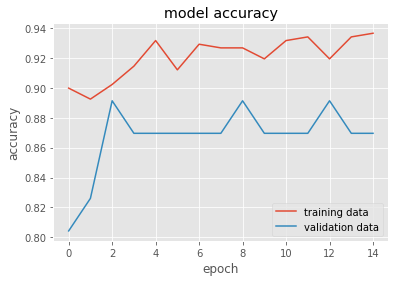

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.title('model accuracy')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

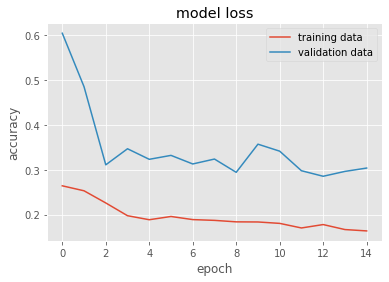

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model loss')
plt.legend(['training data', 'validation data'],loc='upper right')
plt.show()

In [85]:
## accuracy of model on test data 
loss , accuracy = model.evaluate(X_testScaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.7895
